In [16]:
import pandas_datareader as data
from datetime import *
import yfinance as yf



start = datetime.now() - timedelta(days=3650)
end = date.today()

df = yf.Ticker('^NSEI')
df=df.history(start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))



In [17]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-04-11 00:00:00+05:30,6758.350098,6789.350098,6743.149902,6776.299805,140700,0.0,0.0
2014-04-15 00:00:00+05:30,6792.700195,6813.399902,6711.750000,6733.100098,123200,0.0,0.0
2014-04-16 00:00:00+05:30,6727.250000,6748.649902,6665.149902,6675.299805,119800,0.0,0.0
2014-04-17 00:00:00+05:30,6695.450195,6783.049805,6684.399902,6779.399902,131500,0.0,0.0
2014-04-21 00:00:00+05:30,6789.250000,6825.450195,6786.899902,6817.649902,111800,0.0,0.0


In [18]:
len(df)

2451

# New Section

In [19]:

df1=df.reset_index()['Close']
df1

0        6776.299805
1        6733.100098
2        6675.299805
3        6779.399902
4        6817.649902
            ...     
2446    22462.000000
2447    22453.300781
2448    22434.650391
2449    22514.650391
2450    22513.699219
Name: Close, Length: 2451, dtype: float64

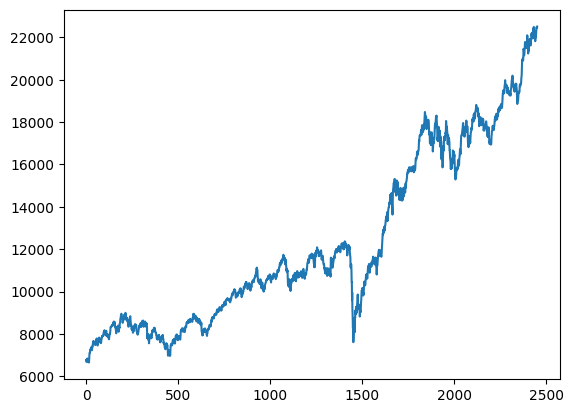

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [21]:
import numpy as np

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.00780161]
 [0.00507816]
 [0.00143424]
 ...
 [0.99495653]
 [1.        ]
 [0.99994003]]


In [23]:
len(df1)

2451

In [24]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(1593, 858)

In [ ]:
print(test_data)


In [25]:
len(test_data)

858

In [ ]:
# import keras.backend as K
# def percentage_difference(y_true, y_pred):
#     return K.mean(abs(y_pred/y_true - 1) * 100)

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 # reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 300
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


(1292, 300)
(1292,)
(557, 300)
(557,)


In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(300,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')  #,metrics=[percentage_difference]
model.summary()

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=128,verbose=1)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - loss: 2.0524e-04 - val_loss: 0.0100
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - loss: 1.9647e-04 - val_loss: 0.0090
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - loss: 1.8366e-04 - val_loss: 0.0079
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - loss: 1.8301e-04 - val_loss: 0.0033
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - loss: 1.7484e-04 - val_loss: 0.0089
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - loss: 1.7672e-04 - val_loss: 0.0115
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - loss: 1.7896e-04 - val_loss: 0.0103
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - loss: 1.9353e-04 - val_loss: 0.0127
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - loss: 2.0543e-04 - val_loss: 0.0046
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - loss: 1.5461e-04 - val_loss: 0.0064
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - loss: 1.4407e-04 - val_loss: 0.0084
Epoch 12/50
11/11 ━━━━━━━━━━━━

In [28]:
train_loss = model.history.history['loss']

In [29]:
train_loss

[0.00018253202142659575,
 0.00019267718016635627,
 0.00016850231622811407,
 0.00016691420751158148,
 0.000171481937286444,
 0.00017068478337023407,
 0.0001734319084789604,
 0.00018926133634522557,
 0.000180825634743087,
 0.00015562503540422767,
 0.00014777561591472477,
 0.00017934106290340424,
 0.00016558227071072906,
 0.00015209332923404872,
 0.00015691129374317825,
 0.00015267748676706105,
 0.00014944745635148138,
 0.00016336618864443153,
 0.00014414420002140105,
 0.00017278670566156507,
 0.00015717149653937668,
 0.00014893949264660478,
 0.00013406794460024685,
 0.00012779931421391666,
 0.0001379181630909443,
 0.00012890119978692383,
 0.00015423257718794048,
 0.0001248153712367639,
 0.00012427705223672092,
 0.00017590973584447056,
 0.0001610431500012055,
 0.00012114586570532992,
 0.00012005567987216637,
 0.00011981273564742878,
 0.00011210620141355321,
 0.0001119869775720872,
 0.00011535100202308968,
 0.00011685911886161193,
 0.00013768298958893865,
 0.00013404000492300838,
 0.000108

In [30]:
len(train_loss)

50

In [31]:
val_loss = model.history.history['val_loss']

In [32]:
len(val_loss)

50

In [33]:
import matplotlib.pyplot as plt

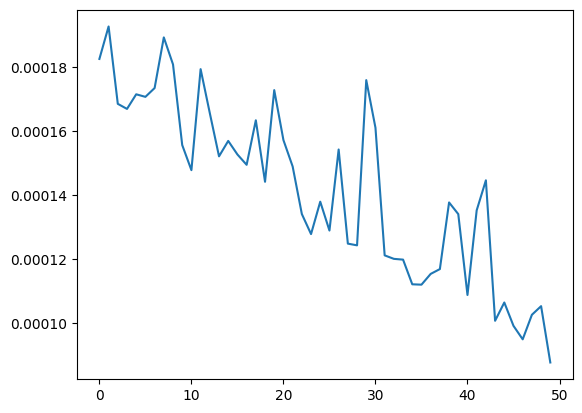

In [34]:
plt.plot(train_loss)

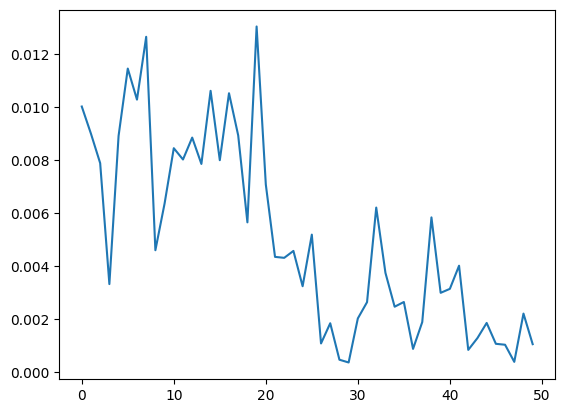

In [35]:
plt.plot(val_loss)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


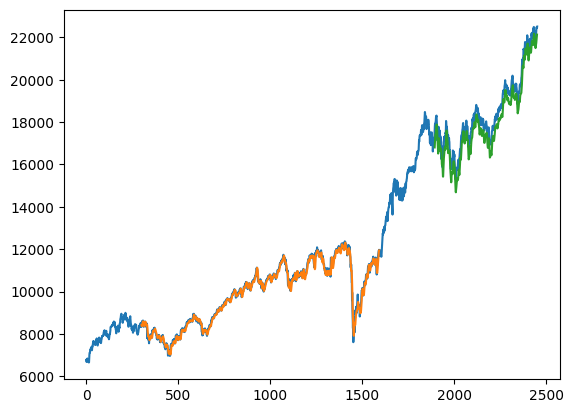

In [36]:
import tensorflow as tf

tf.__version__


### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)



##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


look_back=300
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
print(ytest)


[0.69178413 0.70310361 0.71066881 0.69936201 0.70357323 0.7155894
 0.71889597 0.72876853 0.73163393 0.73150464 0.73480494 0.7225084
 0.71149786 0.70006177 0.69124518 0.66173769 0.6698608  0.6592822
 0.65876517 0.67376321 0.68870448 0.70151177 0.68765479 0.68488728
 0.66580399 0.66915477 0.68157751 0.69053274 0.67596345 0.64242759
 0.67455753 0.67265047 0.67154093 0.66975688 0.66536588 0.6581505
 0.65632544 0.60492621 0.63080237 0.63934474 0.62749567 0.62069339
 0.60476226 0.58066714 0.59014254 0.6110666  0.62679911 0.62904023
 0.64422432 0.63109234 0.65078391 0.67043459 0.65975182 0.67222813
 0.66782458 0.66638086 0.66198358 0.66633358 0.672846   0.6837493
 0.68163735 0.69460532 0.71874784 0.71269568 0.70325494 0.69265738
 0.70178598 0.69488901 0.68576989 0.68232455 0.66328545 0.64973113
 0.66094657 0.67708875 0.66317821 0.64943476 0.66499711 0.65475884
 0.66778677 0.6588031  0.65669422 0.63201275 0.63233117 0.61522118
 0.60832421 0.60442814 0.59982912 0.57719027 0.57556063 0.57935265


In [38]:
print(test_predict)

[[16804.547 ]
 [16929.701 ]
 [17124.86  ]
 [17333.89  ]
 [17421.469 ]
 [17431.424 ]
 [17466.246 ]
 [17528.492 ]
 [17637.816 ]
 [17754.23  ]
 [17834.922 ]
 [17887.64  ]
 [17844.832 ]
 [17703.06  ]
 [17494.299 ]
 [17272.318 ]
 [16960.004 ]
 [16736.488 ]
 [16586.002 ]
 [16515.713 ]
 [16587.855 ]
 [16794.928 ]
 [17074.54  ]
 [17226.975 ]
 [17234.494 ]
 [17060.73  ]
 [16858.312 ]
 [16776.37  ]
 [16836.652 ]
 [16875.393 ]
 [16703.81  ]
 [16632.324 ]
 [16651.637 ]
 [16706.158 ]
 [16749.44  ]
 [16748.713 ]
 [16686.625 ]
 [16601.564 ]
 [16267.435 ]
 [16021.098 ]
 [15965.8545]
 [15973.609 ]
 [15966.981 ]
 [15869.511 ]
 [15627.583 ]
 [15426.557 ]
 [15427.307 ]
 [15626.279 ]
 [15882.137 ]
 [16158.376 ]
 [16295.482 ]
 [16406.064 ]
 [16580.025 ]
 [16686.05  ]
 [16776.072 ]
 [16811.568 ]
 [16797.35  ]
 [16739.955 ]
 [16702.227 ]
 [16727.092 ]
 [16839.375 ]
 [16956.008 ]
 [17102.885 ]
 [17351.781 ]
 [17551.312 ]
 [17600.908 ]
 [17492.938 ]
 [17384.258 ]
 [17282.092 ]
 [17164.514 ]
 [17054.322 ]
 [1688

In [39]:
#ACCURACY
# from sklearn.metrics import confusion_matrix,accuracy_score 
# import numpy as np
# loss, accuracy = model.evaluate(X_test, ytest)
# print(loss)
# print(accuracy)
# cm = confusion_matrix(ytest, np.array(test_predict))
# print(cm)
ypred=model.predict(X_test)
# cm = confusion_matrix(ytest,np.array(ypred))
from sklearn.metrics import r2_score
r2_score(ytest, ypred)    


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step


0.9077245954274322

In [40]:
len(test_data)

858

In [41]:

x_input=test_data[len(test_data)-300:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7087522704687883,
 0.7187415635650303,
 0.725805497343406,
 0.7221805045696887,
 0.7171244769448797,
 0.7228551423212919,
 0.7228393814831453,
 0.7085694201199781,
 0.6904381765424428,
 0.6932498854414861,
 0.6940821315745551,
 0.6911916184847788,
 0.6908196380782097,
 0.7061801755621926,
 0.7005408737944114,
 0.6978237299242476,
 0.7072927922301038,
 0.7086639851488579,
 0.70633458252341,
 0.7009380961683249,
 0.710958787809312,
 0.7163805161317411,
 0.7176413831834689,
 0.711863435292617,
 0.7055843420013224,
 0.7044558413637165,
 0.6872829306244228,
 0.6845688650429598,
 0.6817035939205276,
 0.6770950263412243,
 0.6714999287991823,
 0.6807642233406808,
 0.6726316308570368,
 0.689807743016579,
 0.6971900949781353,
 0.6998978808506495,
 0.6895082870917937,
 0.6783685759423981,
 0.6620655895898679,
 0.6550677774527789,
 0.6505822182899479,
 0.6514301021296156,
 0.6586454877120564,
 0.6516066727694767,
 0.6591151114362057,
 0.661914260917351,
 0.6571860094733719,
 0.6488737680611665,

In [42]:
len(x_input)

1

In [43]:
len(temp_input)

300

In [44]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=300
i=0
while(i<30):
    
    if(len(temp_input)>300):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.97721046]
301
1 day input [0.71874156 0.7258055  0.7221805  0.71712448 0.72285514 0.72283938
 0.70856942 0.69043818 0.69324989 0.69408213 0.69119162 0.69081964
 0.70618018 0.70054087 0.69782373 0.70729279 0.70866399 0.70633458
 0.7009381  0.71095879 0.71638052 0.71764138 0.71186344 0.70558434
 0.70445584 0.68728293 0.68456887 0.68170359 0.67709503 0.67149993
 0.68076422 0.67263163 0.68980774 0.69719009 0.69989788 0.68950829
 0.67836858 0.66206559 0.65506778 0.65058222 0.6514301  0.65864549
 0.65160667 0.65911511 0.66191426 0.65718601 0.64887377 0.65143638
 0.64929291 0.6574255  0.6750178  0.67743241 0.6874563  0.6901104
 0.6916802  0.69787421 0.7035544  0.70453785 0.69690012 0.69395604
 0.69134603 0.69170532 0.6916802  0.6992044  0.70083405 0.70363
 0.71002582 0.71947912 0.72468968 0.72104572 0.73150784 0.71973129
 0.73204999 0.73214763 0.73524624 0.73410518 0.7352274  0.74052612
 0.73344322 0.72683943 0.72357374 0.72820435 0.73520216 0.73732039
 0.7333739  0.7356277  0.74686198 0.7

In [45]:
day_new=np.arange(1,301)
day_pred=np.arange(301,331)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df1)

2451

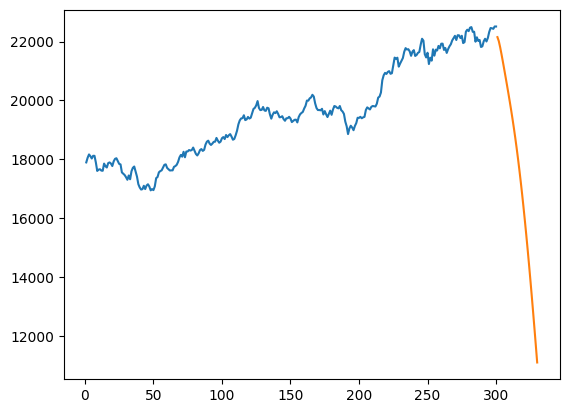

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-300:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

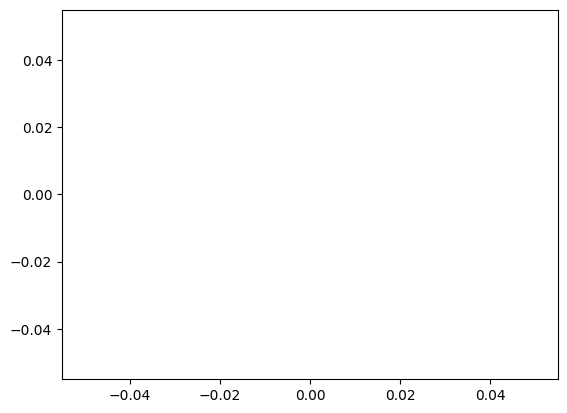

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2640:])

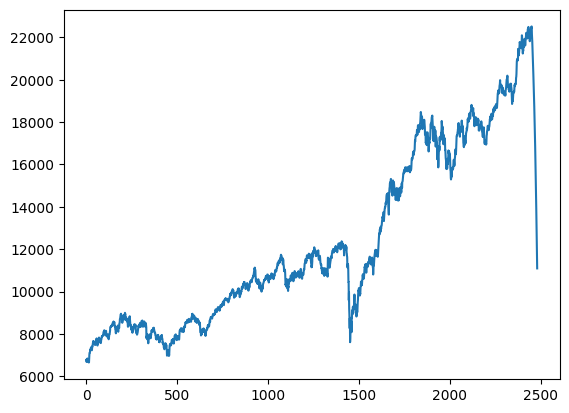

In [50]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [51]:
model.save('future.h5')